In [20]:
import numpy as np
import pandas as pd
inputFile = '.\chapter4\demo\data\discretization_data.xls'
data = pd.read_excel(inputFile)
data.head()

,肝气郁结证型系数
0,0.056
1,0.488
2,0.107
3,0.322
4,0.242


In [21]:
data = data['肝气郁结证型系数'].copy()
k = ['A1', 'A2', 'A3', 'A4']  # 分为 4 类

## 等宽离散化

In [22]:
d1 = pd.cut(x=data, bins=len(k), labels=k)
d1.value_counts()

A2    508
A3    275
A1    112
A4     35
Name: 肝气郁结证型系数, dtype: int64

## 等频离散化

In [ ]:
# 这个是书上的写法
# w = [1.0*i/k for i in range(k+1)]
# w = data.describe(percentiles = w)[4:4+k+1] #使用describe函数自动计算分位数
# w[0] = w[0]*(1-1e-10)
# d2_book = pd.cut(data, w, labels = range(k))
# d2_book.value_counts()

In [23]:
d2 = pd.qcut(x=data,q=len(k), labels=k)
d2.value_counts()

A2    234
A4    233
A1    233
A3    230
Name: 肝气郁结证型系数, dtype: int64

## 聚类（KMeans）

In [ ]:
# # 这是书上的写法
# from sklearn.cluster import KMeans                          # 导入 KMeans
# kmodel = KMeans(n_clusters= 4, n_jobs= 2)                   # 建立模型，n_jobs 为并行数，一般等于 CPU 数
# kmodel.fit(data.reshape(len(data), 1))                      # 训练模型
# c = pd.DataFrame(kmodel.cluster_centers_).sort_values(by=0) # 输出聚类中心，并且排序（默认是随机顺序）
# w = pd.rolling_mean(c, 2).iloc[1:]                          # 相邻两项求中点，作为边界点
# w = [0] + list(w[0]) + [data.max()]                         # 加上首末边界点
# d3 = pd.cut(x=data, bins=len(k), labels=k)                      # 划分数据
# d3.value_counts()

In [24]:
from sklearn.cluster import KMeans                          # 导入 KMeans
kmodel = KMeans(n_clusters= 4, n_jobs= 2)                   # 建立模型，n_jobs 为并行数，一般等于 CPU 数
kmodel.fit(data.values.reshape(len(data), 1))               # 训练模型
c = pd.DataFrame(kmodel.cluster_centers_).sort_values(by=0) # 输出聚类中心，并且排序（默认是随机顺序）
w = c.rolling(window=2, center=False).mean().iloc[1:]       # 相邻两项求中点，作为边界点
w = [0] + list(w[0]) + [data.max()]                         # 加上首末边界点
d3 = pd.cut(x=data, bins=len(k), labels=k)                  # 划分数据
d3.value_counts()

A2    508
A3    275
A1    112
A4     35
Name: 肝气郁结证型系数, dtype: int64

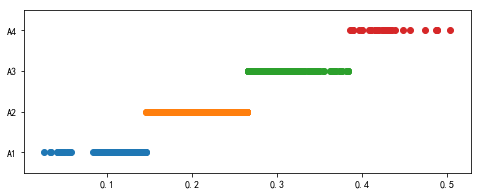

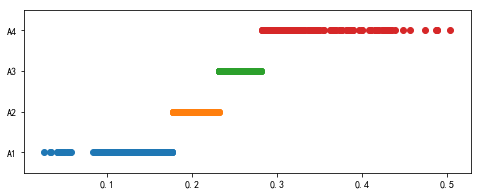

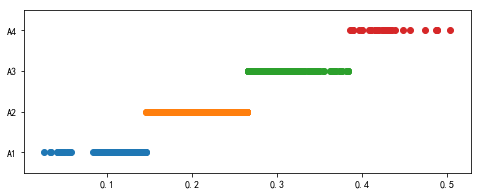

In [25]:
# 自定义作图函数来显示聚类效果
# d 为数据， k 为分类名称列表
def cluster_polt(d, k):
    import matplotlib.pyplot as plt
    plt.rcParams['font.sans-serif'] = ['SimHei']  # 正常显示中文
    plt.rcParams['axes.unicode_minus'] = False   # 正常显示负号
    
    plt.figure(figsize = (8, 3))  # 指定 figure 大小
    for i in k:
        plt.plot(data[d==i], [i for j in d[d==i]], 'o')  # 绘制
        
    plt.ylim(-0.5, 4-0.5)  # 设置 Y 轴
    return plt

cluster_polt(d1, k).show()
cluster_polt(d2, k).show()
cluster_polt(d3, k).show()